In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score,confusion_matrix

In [2]:
dataset = pd.read_csv("train.csv",index_col ='INCIDENT_ID')
predictionset = pd.read_csv("test.csv", index_col = 'INCIDENT_ID')
dataset.head()

,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
INCIDENT_ID,,,,,,,,,,,,,,,,,
CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [3]:
dataset.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23856 entries, CR_102659 to CR_22575
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              23856 non-null  object 
 1   X_1               23856 non-null  int64  
 2   X_2               23856 non-null  int64  
 3   X_3               23856 non-null  int64  
 4   X_4               23856 non-null  int64  
 5   X_5               23856 non-null  int64  
 6   X_6               23856 non-null  int64  
 7   X_7               23856 non-null  int64  
 8   X_8               23856 non-null  int64  
 9   X_9               23856 non-null  int64  
 10  X_10              23856 non-null  int64  
 11  X_11              23856 non-null  int64  
 12  X_12              23674 non-null  float64
 13  X_13              23856 non-null  int64  
 14  X_14              23856 non-null  int64  
 15  X_15              23856 non-null  int64  
 16  MULTIPLE_OFFENSE  23856 non-null  

In [5]:
predictionset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15903 entries, CR_195453 to CR_33545
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    15903 non-null  object 
 1   X_1     15903 non-null  int64  
 2   X_2     15903 non-null  int64  
 3   X_3     15903 non-null  int64  
 4   X_4     15903 non-null  int64  
 5   X_5     15903 non-null  int64  
 6   X_6     15903 non-null  int64  
 7   X_7     15903 non-null  int64  
 8   X_8     15903 non-null  int64  
 9   X_9     15903 non-null  int64  
 10  X_10    15903 non-null  int64  
 11  X_11    15903 non-null  int64  
 12  X_12    15776 non-null  float64
 13  X_13    15903 non-null  int64  
 14  X_14    15903 non-null  int64  
 15  X_15    15903 non-null  int64  
dtypes: float64(1), int64(14), object(1)
memory usage: 2.1+ MB


Text(0.5, 1.0, 'Bank server hack 1-Yes 0- No')

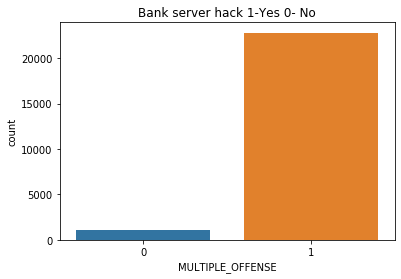

In [6]:
sns.countplot(data=dataset, x="MULTIPLE_OFFENSE").set_title("Bank server hack 1-Yes 0- No")

In [7]:
dataset['DATE']=pd.to_datetime(dataset['DATE']).map(dt.datetime.toordinal)
predictionset['DATE']=pd.to_datetime(predictionset['DATE']).map(dt.datetime.toordinal)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23856 entries, CR_102659 to CR_22575
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              23856 non-null  int64  
 1   X_1               23856 non-null  int64  
 2   X_2               23856 non-null  int64  
 3   X_3               23856 non-null  int64  
 4   X_4               23856 non-null  int64  
 5   X_5               23856 non-null  int64  
 6   X_6               23856 non-null  int64  
 7   X_7               23856 non-null  int64  
 8   X_8               23856 non-null  int64  
 9   X_9               23856 non-null  int64  
 10  X_10              23856 non-null  int64  
 11  X_11              23856 non-null  int64  
 12  X_12              23674 non-null  float64
 13  X_13              23856 non-null  int64  
 14  X_14              23856 non-null  int64  
 15  X_15              23856 non-null  int64  
 16  MULTIPLE_OFFENSE  23856 non-null  

In [9]:
dataset['X_12']= dataset['X_12'].fillna(0).astype(int)
predictionset['X_12']= predictionset['X_12'].fillna(0).astype(int)

In [10]:
correlation = dataset.corr()

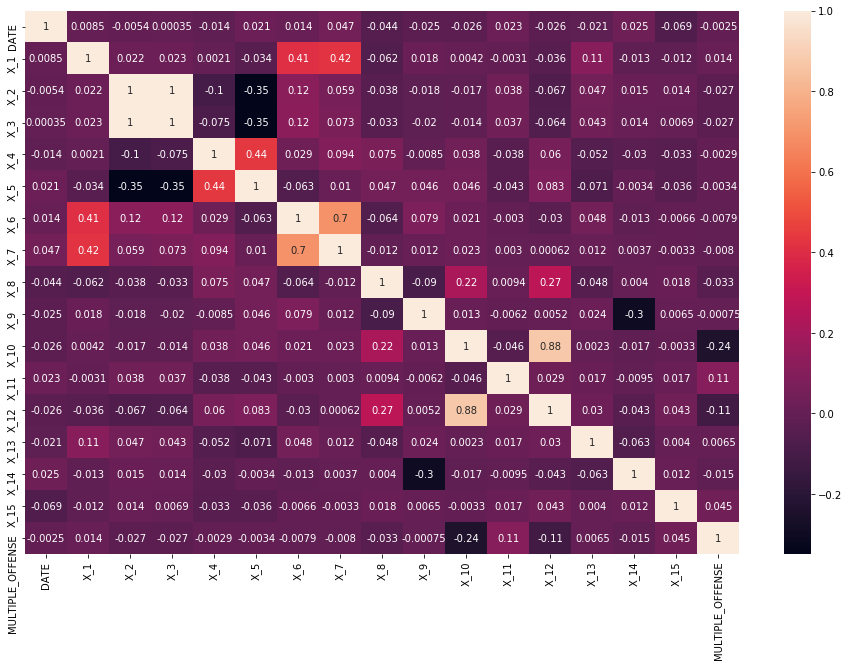

In [11]:
plt.figure(figsize = (16,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

In [12]:
X = dataset.drop('MULTIPLE_OFFENSE', axis=1)
y = dataset['MULTIPLE_OFFENSE']

In [13]:
corr_matrix = dataset.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
dataset.drop(dataset[to_drop], axis=1)

,DATE,X_1,X_2,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
INCIDENT_ID,,,,,,,,,,,,,,,,
CR_102659,731766,0,36,2,1,5,6,1,6,1,174,1,92,29,36,0
CR_189752,736528,1,37,0,0,11,17,1,6,1,236,1,103,142,34,1
CR_184637,736403,0,3,3,5,1,0,2,3,1,174,1,110,93,34,1
CR_139071,733451,0,33,2,1,7,1,1,6,1,249,1,72,29,34,1
CR_109335,732049,0,33,2,1,8,3,0,5,1,174,0,112,29,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CR_88991,730861,1,47,7,3,15,10,1,5,1,174,0,98,29,34,1
CR_46369,729060,0,33,2,1,5,6,0,5,1,174,0,112,29,43,1
CR_157556,734596,0,25,9,0,3,5,1,6,1,174,0,10,29,18,1


In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier( random_state = 0) #entropy for the information gain.
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
print( "Accuracy score:",accuracy_score(y_test, y_pred))
print( "Recall score:",recall_score(y_test, y_pred))

Accuracy score: 0.9987424898700573
Recall score: 0.9992694330800701


Text(0.5, 15.0, 'Predicted label')

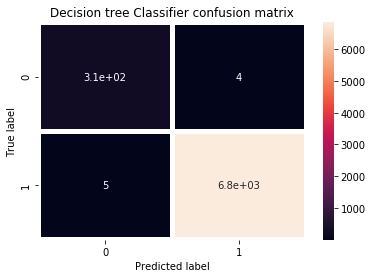

In [19]:
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot = True,  linewidths=4)
plt.title('Decision tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [20]:
predictions = classifier.predict(sc.transform(predictionset))
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [21]:
predictionset['MULTIPLE_OFFENSE'] = predictions

Text(0.5, 1.0, 'Predictions of Bank server hack 1-Yes 0- No')

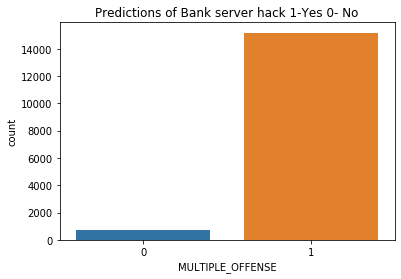

In [22]:
sns.countplot(data=predictionset, x="MULTIPLE_OFFENSE").set_title("Predictions of Bank server hack 1-Yes 0- No")

In [23]:
predictionfiledata = predictionset.iloc[:,-1]
predictionfiledata

INCIDENT_ID
CR_195453    1
CR_103520    1
CR_196089    1
CR_112195    1
CR_149832    1
            ..
CR_44468     1
CR_158460    1
CR_115946    1
CR_137663    1
CR_33545     1
Name: MULTIPLE_OFFENSE, Length: 15903, dtype: int64

In [24]:
predictionfiledata.to_csv('predictedset.csv')